In [1]:
import numpy as np
import os
import itertools
import json
import pickle
import random
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import model_from_json
from keras import regularizers, optimizers
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import torch
from torchvision.utils import make_grid

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Set path so that functions can be imported from the utils script
sys.path.insert(0, '../')
from preprocess import sample_timeseries
from visualize import visualize_rgb, record_batch
from constants import *
import datasets
import util
import models


Using TensorFlow backend.


In [2]:
class ArgumentParse():
    def __init__():
        self.batch_size = None

args = ArgumentParse
args.model_name = 'fcn_crnn'
args.hdf5_filepath = '/home/data/ghana/data.hdf5'
args.use_s1 = False
args.use_s2 = True
args.num_classes = 4
args.apply_transforms = False
args.sample_w_clouds = True
args.include_clouds = True
args.include_doy = False
args.time_slice = None
args.seed = None
args.least_cloudy = False
args.batch_size = 8
args.shuffle = False
args.num_workers = 8

In [3]:
show_models = ['cnn', 'fcn_crnn']

fcn_crnn_model_path = '/home/data/ghana/models/best_from_scratch_fcn_crnn'
test_list_pkl = '/home/data/ghana/ghana_full_val'
test_imgs_dir = '/home/data/ghana/s2_npy'
label_dir = '/home/data/ghana/raster_npy'
dates = None
batch = args.batch_size
    

In [5]:
dataloaders = datasets.get_dataloaders('/home/data/ghana', 'ghana', 'full', args=args)
dl = dataloaders['test']
split = 'test'
vis_data = None
vis = None

if 'fcn_crnn' in show_models:
    fcn_crnn_model = models.get_model(**vars(args))
    fcn_crnn_model.load_state_dict(torch.load(fcn_crnn_model_path))
    fcn_crnn_model.eval()
  
    for inputs, targets, cloudmasks in dl:
        print('inputs: ', inputs.shape)
        print('targets: ', targets.shape)
        labels_grid, inputs_grid, targets_grid, preds_grid, predsmask_grid = record_batch(
                                                                           inputs, cloudmasks, targets, cur_batch_imgs, #<< preds
                                                                           args.num_classes, split, vis_data, 
                                                                           vis, args.include_doy, args.use_s1, 
                                                                           args.use_s2, model_name, args.time_slice, 
                                                                           save=False, save_dir=None, 
                                                                           show_visdom=False, show_matplot=True)
    

FCN_CRNN()


RuntimeError: Error(s) in loading state_dict for FCN_CRNN:
	Unexpected key(s) in state_dict: "fcn.enc1.encode.0.weight", "fcn.enc1.encode.0.bias", "fcn.enc1.encode.1.weight", "fcn.enc1.encode.1.bias", "fcn.enc1.encode.3.weight", "fcn.enc1.encode.3.bias", "fcn.enc1.encode.4.weight", "fcn.enc1.encode.4.bias", "fcn.enc2.encode.0.weight", "fcn.enc2.encode.0.bias", "fcn.enc2.encode.1.weight", "fcn.enc2.encode.1.bias", "fcn.enc2.encode.3.weight", "fcn.enc2.encode.3.bias", "fcn.enc2.encode.4.weight", "fcn.enc2.encode.4.bias", "fcn.center.decode.0.weight", "fcn.center.decode.0.bias", "fcn.center.decode.1.weight", "fcn.center.decode.1.bias", "fcn.center.decode.1.running_mean", "fcn.center.decode.1.running_var", "fcn.center.decode.1.num_batches_tracked", "fcn.center.decode.3.weight", "fcn.center.decode.3.bias", "fcn.center.decode.4.weight", "fcn.center.decode.4.bias", "fcn.center.decode.4.running_mean", "fcn.center.decode.4.running_var", "fcn.center.decode.4.num_batches_tracked", "fcn.center.decode.6.weight", "fcn.center.decode.6.bias", "fcn.dec2.decode.0.weight", "fcn.dec2.decode.0.bias", "fcn.dec2.decode.1.weight", "fcn.dec2.decode.1.bias", "fcn.dec2.decode.1.running_mean", "fcn.dec2.decode.1.running_var", "fcn.dec2.decode.1.num_batches_tracked", "fcn.dec2.decode.3.weight", "fcn.dec2.decode.3.bias", "fcn.dec2.decode.4.weight", "fcn.dec2.decode.4.bias", "fcn.dec2.decode.4.running_mean", "fcn.dec2.decode.4.running_var", "fcn.dec2.decode.4.num_batches_tracked", "fcn.dec2.decode.6.weight", "fcn.dec2.decode.6.bias", "fcn.dec1.0.weight", "fcn.dec1.0.bias", "fcn.dec1.1.weight", "fcn.dec1.1.bias", "fcn.dec1.1.running_mean", "fcn.dec1.1.running_var", "fcn.dec1.1.num_batches_tracked", "fcn.dec1.3.weight", "fcn.dec1.3.bias", "fcn.dec1.4.weight", "fcn.dec1.4.bias", "fcn.dec1.4.running_mean", "fcn.dec1.4.running_var", "fcn.dec1.4.num_batches_tracked", "fcn.final.weight", "fcn.final.bias", "crnn.clstm.cell_list.0.conv.weight", "crnn.clstm.cell_list.0.conv.bias", "crnn.conv.weight", "crnn.conv.bias". 

Loaded model from disk
[1 2 3]
[2 3]
[1 2 3 4]
[2 3]
[2 3]
[1 2 3]
[1 2 3 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


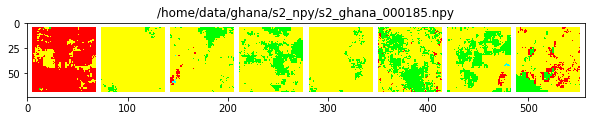

[1 2 3]
[1 2]
[2]
[1 2]
[1 2]
[2]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2 3 4]


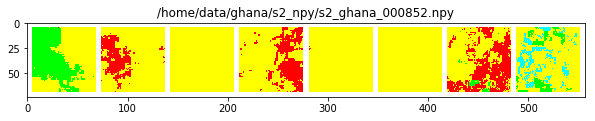

[1 2 3]
[1 2 3]
[1 2 3 4]
[1 2 3]
[1 2 3]
[2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


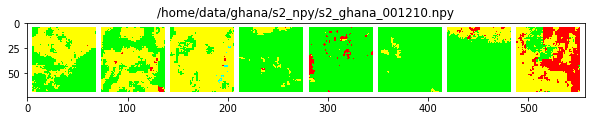

[1 2 3]
[1 2 3]
[1 2]
[1 2]
[2]
[2]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


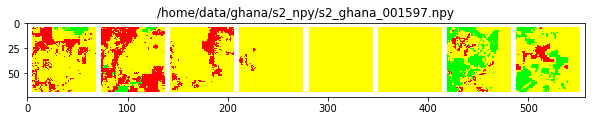

[1 2 3 4]
[2 3]
[1 2 3]
[2 3]
[1 2 3]
[2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


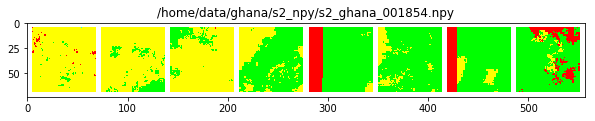

[1 2 3]
[1 2 3]
[2 3]
[1 2 3]
[2]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2]


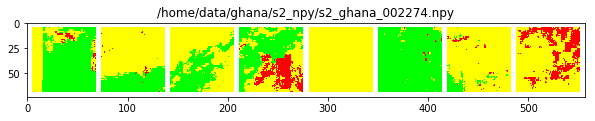

[2 3 4]
[1 2 3 4]
[2 3]
[1 2 3]
[1 2 3 4]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


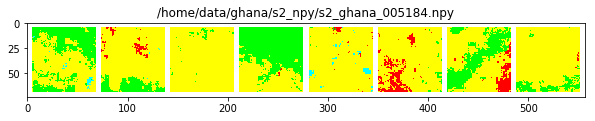

[1 2 3]
[1 2 3]
[2 3]
[2 3]
[1 2 3]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


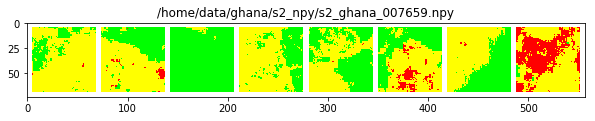

[2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


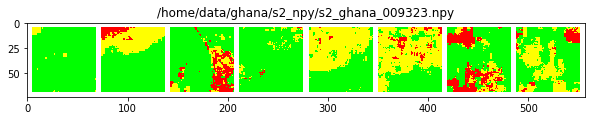

[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3 4]
[1 2 3 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2 3]


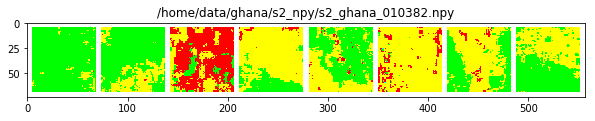

[2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3 4]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


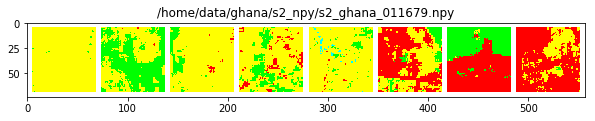

[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3 4]
[1 2 3]
[1 2 3 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3 4]


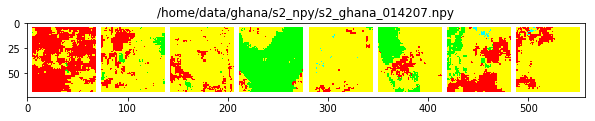

[1 2 4]
[2]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


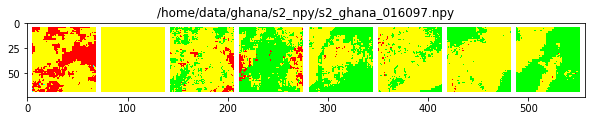

[3]
[2 3]
[2 3]
[2 3]
[1 2 3]
[2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


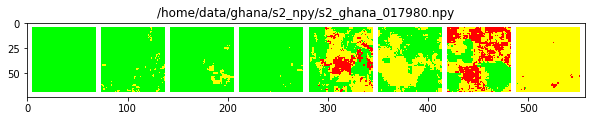

[1 2 3]
[1 2 3]
[1 2 3]
[2 3]
[2]
[1 2 3]
[2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2 3]


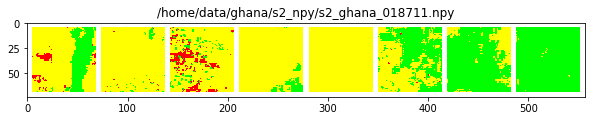

[1 2 3]
[1 2 3]
[1 2 4]
[1 2 3 4]
[1 2 3 4]
[2 3]
[1 2 3]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 4]


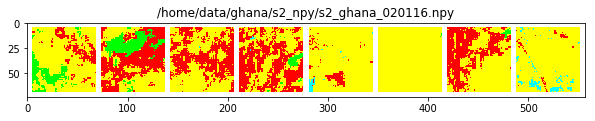

[1 2 4]
[1 2 4]
[1 2 3 4]
[2 4]
[1 2 3 4]
[1 2 3 4]
[1 2 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 2 3]


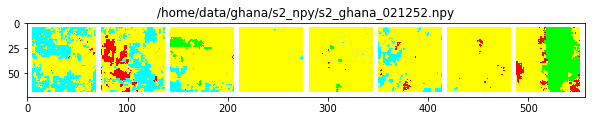

[1 2 3 4]
[1 2 3]
[1 2 3]
[1 2 3 4]
[1 2 3]


In [ ]:
if 'cnn' in show_models:
    model_json = '/home/data/ghana/models/best_1dcnn_model.json'
    model_hdf5 = '/home/data/ghana/models/best_1dcnn_model.hdf5'

    # load json and create model
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(model_hdf5)
    print("Loaded model from disk")
    # evaluate loaded model on test data
    loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    X_train = np.load('/home/data/ghana/pixel_arrays/full/raw/full_raw_s2_cloud_mask_reverseFalse_bytime_Xtrain_g2260.npy')
    # Normalize by standard scalar
    scaler = StandardScaler()
    scaler.fit(X_train)
        
    with open(test_list_pkl, 'rb') as f:
        test_grids = pickle.load(f)
    
    test_fnames = [os.path.join(test_imgs_dir,f) for f in os.listdir(test_imgs_dir) if f[9:15] in test_grids and f.endswith('.npy')]
    test_fnames.sort()

    for idx in range(0, len(test_fnames), batch*2):
        num_in_batch = 0
        cur_batch_imgs = []
        while num_in_batch < 2*batch:
        
            s2_img = np.load(test_fnames[idx+num_in_batch])
            clouds = np.load(test_fnames[idx+num_in_batch+1])
            s2_img, _, clouds = sample_timeseries(s2_img, 25, dates, clouds, seed=1234)
            clouds = np.expand_dims(clouds, 0)
    
            all_data = np.concatenate((s2_img, clouds), axis=0)
    
            data = np.transpose(all_data, (1, 2, 3, 0))
            data = np.reshape(data, (-1, 275))
            data = scaler.transform(data)
            data = np.reshape(data, (64*64, -1, 11))                            
            pred = np.argmax(loaded_model.predict(data), axis=1) + 1
            print(np.unique(pred))
            pred = np.reshape(pred, (1, 1, 64, 64))
            pred = visualize_rgb(pred, num_classes=5)
        
            cur_batch_imgs.append(pred)
            num_in_batch += 2
        
        cur_batch_imgs = np.concatenate(cur_batch_imgs, axis=0)
        cur_batch_grid = make_grid(torch.from_numpy(cur_batch_imgs), nrow=8, padding=5, normalize=False, range=None, scale_each=False, pad_value=255)
        cur_batch_grid = np.transpose(cur_batch_grid, (1, 2, 0))
    
        plt.figure(figsize=(10,10))
        plt.imshow(cur_batch_grid)
        plt.title(test_fnames[idx])
        plt.show()        


CNN RESULTS
Groundnut Test Accuracy:  0.35402275497765134
Maize Test Accuracy:  0.6547378723924879
Rice Test Accuracy:  0.6667678607569318
Soya Test Accuracy:  0.32504388531304856
Overall Accuracy:  56.88%

Groundnut F1:  0.32105021
Maize F1:  0.65811966
Rice F1:  0.6740665
Soya F1:  0.3642623
Overall F1 score:  0.504%

NN RESULTS
Groundnut Test Accuracy:  0.42757009345794394
Maize Test Accuracy:  0.5865296384657736
Rice Test Accuracy:  0.6357012750455373
Soya Test Accuracy:  0.16544763019309539
Overall Accuracy:  51.97%

Groundnut F1:  0.33728664
Maize F1:  0.6129455
Rice F1:  0.60204131
Soya F1:  0.22362827
Overall F1 score:  0.444%

